In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Age : missing values. only 714/891 = 177values are present
# Cabin : Missing values. 204/891 = 687values are present. around 700 missing
# Embarked : missing values. 889/891 present. 2 values missing

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# lets look into test data set:

test.shape

(418, 11)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Age : 86 missing values
# Cabin : 327 missing values

##### Relationship between Features and Survival 

In [23]:
# Creating survival dataframes:
survived = train[train['Survived']==1]
not_survived = train[train['Survived']==0]

In [47]:
print("Survived: %i (%.1f%%)"%(len(survived),float(len(survived))/len(train)*100.0))
print("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [52]:
## Pclass vs Survival:

train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [54]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [55]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

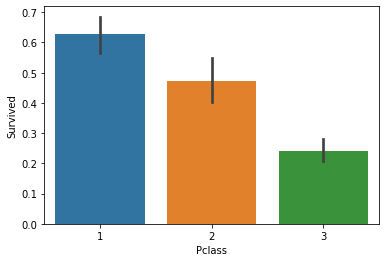

In [56]:
#Plotting:
sns.barplot(x='Pclass',y='Survived', data=train)

In [58]:
# Sex vs Survival:

train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [59]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [60]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

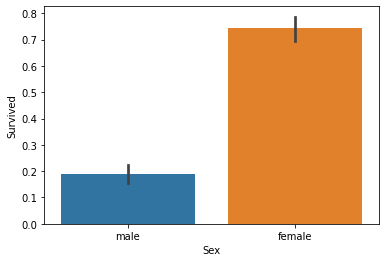

In [61]:
#Plotting:

sns.barplot(x='Sex',y='Survived',data=train)

In [62]:
# PClass & Sex vs Survival:
tab = pd.crosstab(train['Pclass'],train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

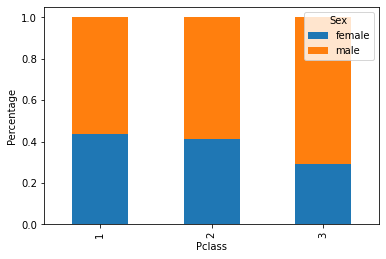

In [67]:
tab.div(tab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

/Users/sruthi_mudunuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sruthi_mudunuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


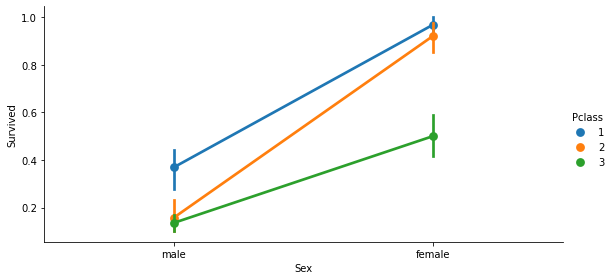

In [71]:
sns.factorplot(data= train, x='Sex', y='Survived', hue='Pclass',size=4,aspect=2)

/Users/sruthi_mudunuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


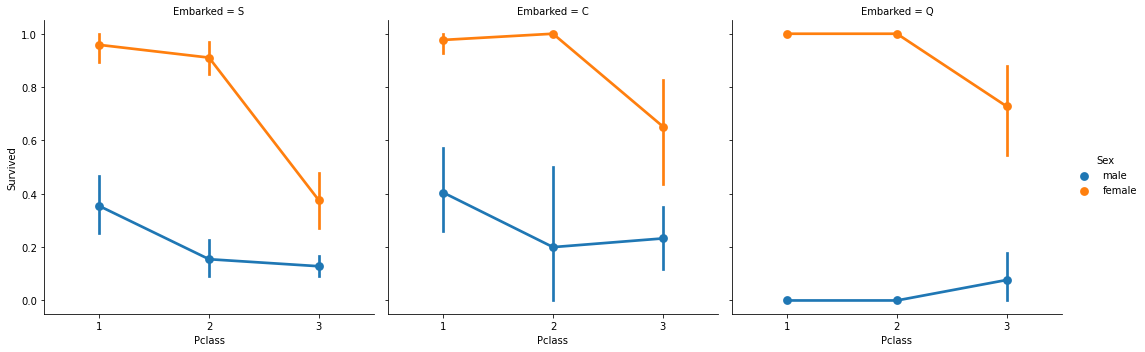

In [72]:
#Pclass,Sex & Embarked vs Survival :
sns.factorplot(x='Pclass',y='Survived',hue='Sex', col='Embarked',data=train)


In [73]:
# Looking at the graphs: Women from Pclass 1 and 2 mostly survived irrespective of their embarked port.
# Women not survived are mostly from Pclass 3.
# Males from Pclass 1 and 2 have slightly more chance of surviving than from pclass 3.
# Outlier: Men embarked from Q have slightly higher chance of surviving than Embarked=S or C

In [75]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
#Embarked vs Survived:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [76]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

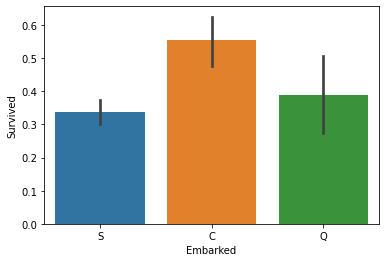

In [86]:
sns.barplot(x='Embarked',y='Survived',data=train)

In [80]:
# Embarked & Sex vs Survival:

tab2 = pd.crosstab(train['Embarked'], train['Sex'])
print(tab2)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


Text(0, 0.5, 'Percentages')

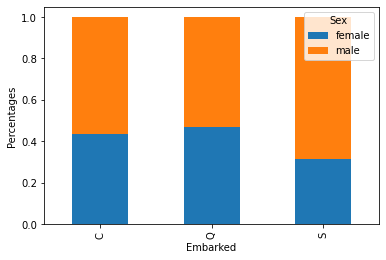

In [82]:
tab2.div(tab2.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentages')

/Users/sruthi_mudunuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sruthi_mudunuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


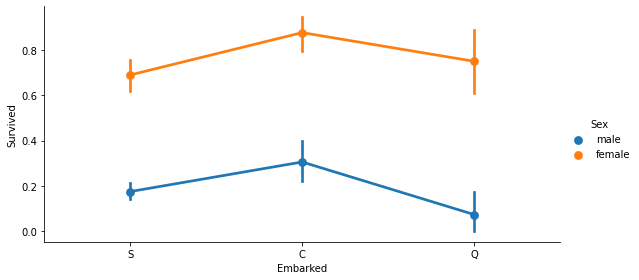

In [87]:
sns.factorplot(data=train, x='Embarked',y='Survived',hue='Sex',aspect=2,size=4)

In [ ]:
# Embarked= S: Survival rate is above 0.3 and in which 0.7 is female and below .2 are male.
#Embarked = C: Survival is almost .6 and in which .8 is female and >.2 are male.
#Embarked = Q: Survival above .3 and in which .7 is female and .1 is male

In [89]:
# Parch vs Survival :

train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [90]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [91]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

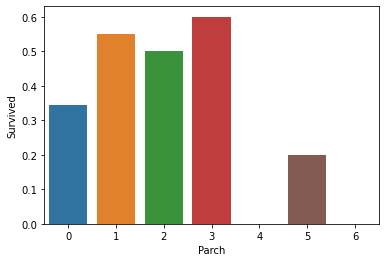

In [93]:
sns.barplot(x='Parch',y='Survived',data=train, ci=None)

In [95]:
#SibSp vs Survival:

train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [96]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [129]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0, 0.5, 'Survived_mean')

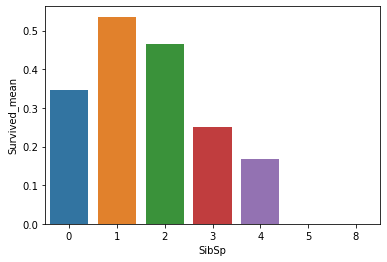

In [101]:
sns.barplot(x='SibSp', y='Survived',data=train,ci=None)
plt.ylabel('Survived_mean')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

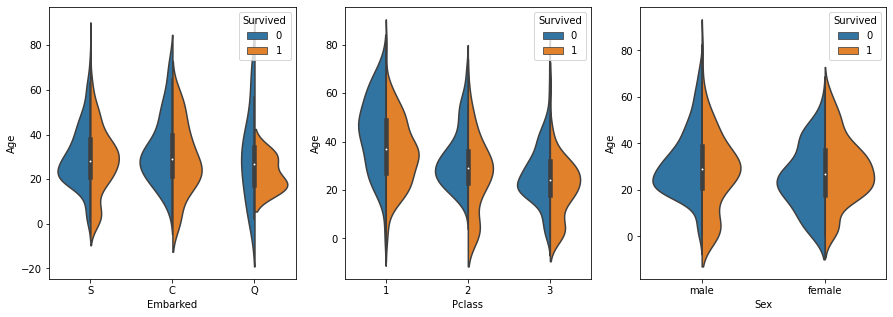

In [102]:
#Age vs Survival:

fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(131)
ax2= fig.add_subplot(132)
ax3= fig.add_subplot(133)

sns.violinplot(x='Embarked',y='Age',hue='Survived',data=train,split=True,ax=ax1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train,split=True,ax=ax2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train,split=True,ax=ax3)

In [ ]:
#Pclass 1 : fewer children, high no of Older people comparatively with Pclass 2 & 3.
# Younger people of 1st class survived compared to its older people.
#Children from Pclass 2 & 3 mostly survived.
# Almost all children of age 0 to 10 of Pclass 2 have survived.
# Boys of afe group 0 to 14 have tend to have high survival than girls of same age category.
# Women of 18 to 40 have high survival chance than Men.
# Most people of age 10 to 30 embarked=Q have survived.


### Plotting Total vs survived/not survived
### Plotting Total female vs survived/not survived
### Plotting total male vs survived/not survived


<AxesSubplot:xlabel='Male Age'>

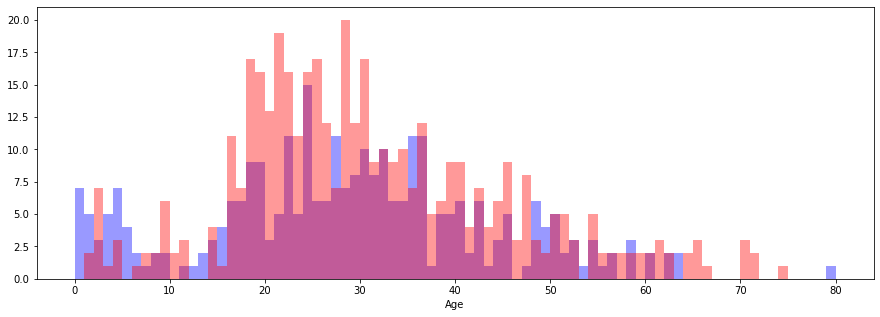

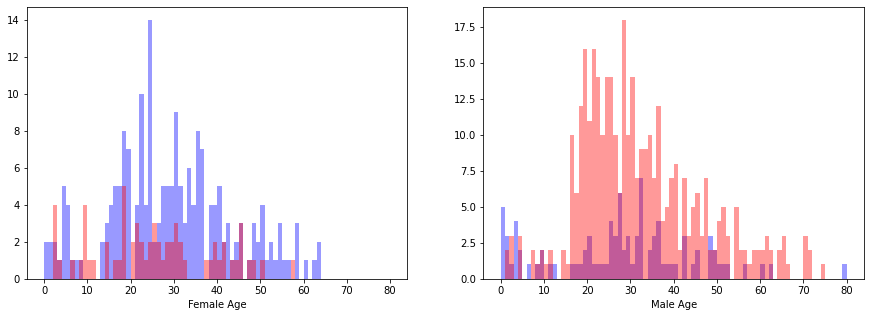

In [107]:
total_survived = train[train['Survived']==1]
total_notsurvived = train[train['Survived']==0]

female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
female_notsurvived = train[(train['Survived']==0)&(train['Sex']=="female")]

male_survived = train[(train['Survived']==1)&(train['Sex']=='male')]
male_notsurvived = train[(train['Survived']==0) & (train['Sex']=='male')]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0,81,1), kde=False, color='blue')
sns.distplot(total_notsurvived['Age'].dropna().values,bins=range(0,81,1),kde=False,color='red', axlabel='Age')


plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0,81,1), kde=False, color='blue')
sns.distplot(female_notsurvived['Age'].dropna().values, bins=range(0,81,1),kde=False, color = 'red', axlabel='Female Age')


plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0,81,1), kde=False, color='blue')
sns.distplot(male_notsurvived['Age'].dropna().values, bins=range(0,81,1), kde=False, color='red', axlabel='Male Age')


In [ ]:
# In total Survived : both male and female, we can see children from age 0 to 5 have better chance of surviving.
# In female : In age 15 to 40 and above 50 have high chance of surviving.
# In male 0 to 5 have better chance of surviving.


## Correlating Features

<AxesSubplot:>

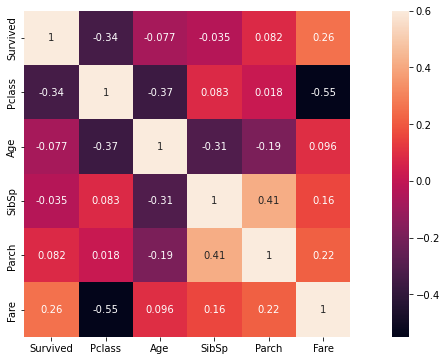

In [108]:
plt.figure(figsize=[15,6])
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

##### We study features that have high positive and negative correlation with Survived.

## Feature Extraction:

#### Name Feature :

In [109]:
train_test_data = [train, test] #combining train and test datasets
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [111]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [113]:
# Replace less common names with other

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
    
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [114]:
#Conversion of categorical variable Title into numerical variable:

title_mapping = {"Mr":1, "Miss" : 2, "Mrs":3, "Master":4, "Other":5}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### Sex feature:

In [116]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"female":1, "male":0}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


#### Embarked feature:

In [118]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [121]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [122]:
# Replacing nan values with S

for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].fillna('S')
    
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [123]:
# Now, replace categorical variables into numerical:

for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({'S':0,'C':1,'Q':2}).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


#### Age Feature:

In [125]:
train.Age.unique() #Checking for unique and null values

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [127]:
train.Age.mean()

29.69911764705882

In [132]:
# Replace nan values in Age:
# replace with random variable in between avg age - std age , avg + std age

for dataset in train_test_data:
    age_avg = dataset["Age"].mean()
    age_std = dataset["Age"].std()
    age_null_count = dataset["Age"].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset["Age"][np.isnan(dataset["Age"])] = age_null_random_list
    dataset["Age"] = dataset["Age"].astype(int)
    
train["AgeBand"] = pd.cut(train["Age"],5)

print(train[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index = False).mean())
    

         AgeBand  Survived
0  (-0.08, 16.0]  0.558559
1   (16.0, 32.0]  0.352668
2   (32.0, 48.0]  0.360595
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/var/folders/5q/rvlfhz4j2sz5tfhr41kjns340000gn/T/ipykernel_7119/3749622923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"][np.isnan(dataset["Age"])] = age_null_random_list


In [133]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16, 'Age'] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), 'Age'] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), 'Age'] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), 'Age'] = 3
    dataset.loc[(dataset["Age"] > 64) & (dataset["Age"] <= 80), 'Age'] = 4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


#### Fare Feature:

In [136]:
for dataset in train_test_data:
    dataset["Fare"] = dataset["Fare"].fillna(train["Fare"].median())

In [139]:
train["Fare"].median()

14.4542

In [140]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[["FareBand","Survived"]].groupby(["FareBand"], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [152]:
# Diving dataset['Fare'] to category:

for dataset in train_test_data:
    dataset.loc[dataset['Fare']<= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare']>31.0) & (dataset['Fare']<=512.329), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
print(train.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    0    1   0.0         0      1        0
1         1       1    1    2   3.0         1      3        0
2         1       3    1    1   1.0         0      2        1
3         1       1    1    2   3.0         0      3        0
4         0       3    0    2   1.0         0      1        1


#### Combining SibSp and Parch to create family size:

In [142]:
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
print(train[["FamilySize","Survived"]].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [143]:
#Family size between 2 to 4 has better survival chance
#Family size above 5 have less survival chance
#Family Size = 1 has less survival chance

###Creating new variable 'IsAlone': 
for dataset in train_test_data:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"]==1, 'IsAlone'] = 1
    
print(train[["IsAlone","Survived"]].groupby(['IsAlone'], as_index = False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [145]:
# passengers travelling alone had only 30% chance of survival
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0.0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3.0,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0


### Feature Selection

In [146]:
features_drop = ['Name','SibSp','Parch','Ticket','Cabin','FamilySize']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId','AgeBand','FareBand'], axis = 1)

In [154]:
train.head()
train.convert_dtypes()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0.0,0,1,0
1,1,1,1,2,3.0,1,3,0
2,1,3,1,1,1.0,0,2,1
3,1,1,1,2,3.0,0,3,0
4,0,3,0,2,1.0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1.0,0,5,1
887,1,1,1,1,2.0,0,2,1
888,0,3,1,2,2.0,0,2,0
889,1,1,0,1,2.0,1,1,1


In [148]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0.0,2,1.0,1
1,893,3,1,2,0.0,0,3.0,0
2,894,2,0,3,1.0,2,1.0,1
3,895,3,0,1,1.0,0,1.0,1
4,896,3,1,1,1.0,0,3.0,0
